# Project Description
信用违约对商业银行的持续运营至关重要。一家零售银行希望通过信用违约模型来识别未来12个月可能违约的信用卡用户。这个模型可用于管理银行风险和降低未来损失的未来行动。

现在，您可以获取他们系统中提取的一些样本数据，用于构建信用违约模型，并预测可能违约的消费者。根据银行的经验，不良报告的数量是违约的一个强烈指标。目前你能从银行得到的信息就是这些。

您可以选择任何您想要完成此任务的模型，并建议您学习一些基本的银行知识，熟悉其术语。需要进行数据预处理，您可能需要进行一些特征工程（如归一化或离散化）。欢迎参考与银行模型相关的各种信息。

数据描述

您可以在Kaggle页面找到数据。因为这是一个私人比赛，您只能通过此链接加入此比赛。

训练数据包括2000个样本，共13列，第一列是DEFAULT值，其他列是相关属性。
* DEFAULT - 如果违约则为1，否则为0
* AGE - 以年为单位的年龄加上一年的十二分之一
* ACADMOS - 当前地址居住月数
* ADEPCNT - 1 + 受抚养人数
* MAJORDRG - 严重不良报告数量
* MINORDRG - 轻微不良报告数量
* OWNRENT - 如果拥有自己的房子则为1，如果租房则为0
* INCOME - 月收入（除以10,000）
* SELFEMPL - 如果是自雇则为1，否则为0
* INCPER - 收入除以受抚养人数
* EXP_INC - 月信用卡支出与年收入的比率
* SPENDING - 平均每月信用卡支出
* LOGSPEND - 支出的对数

测试数据包括1000个样本以预测，具有与训练数据相同的12个属性。您的目标是根据给定的信息预测消费者是否会违约（1）或不违约（0）。还有一个样本提交文件，用于规范化您的预测提交。

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/DSAA5013Spring/samplesubmission.csv
/kaggle/input/DSAA5013Spring/train.csv
/kaggle/input/DSAA5013Spring/test.csv


## 2.探索性数据分析（EDA）

### 2.1 Data Overview

In [2]:
#获取数据并
#阅读前10行内容
train_data = pd.read_csv("/kaggle/input/DSAA5013Spring/train.csv")
test_data = pd.read_csv("/kaggle/input/DSAA5013Spring/test.csv")
train_data.head(10)

,ID,DEFAULT,AGE,ACADMOS,ADEPCNT,MAJORDRG,MINORDRG,OWNRENT,INCOME,SELFEMPL,INCPER,EXP_INC,SPENDING,LOGSPEND
0,0,0,37.583332,6,0,0,0,1,2916.666667,1,39000.0,0.116674,340.300227,5.829828
1,1,1,23.750000,6,0,1,0,1,8333.250000,0,99999.0,0.043130,359.416667,5.884482
2,2,0,47.833332,96,1,0,1,1,3333.333333,0,20000.0,0.051814,172.715001,5.151643
3,3,0,22.916666,4,0,0,0,0,2100.000000,0,25200.0,0.035337,74.208336,4.306877
4,4,0,24.000000,64,0,0,0,0,1541.666667,0,18500.0,0.168817,260.259172,5.561678
5,5,1,22.250000,25,3,0,0,1,3333.333333,0,10000.0,0.018469,61.562502,4.120053
6,6,0,26.666666,38,0,0,0,0,1916.666667,0,23000.0,0.013304,25.500000,3.238678
7,7,1,49.083332,16,0,0,0,1,2083.333333,0,53000.0,0.057697,120.201653,4.789171
8,8,0,27.833334,12,1,0,1,1,1658.333333,0,9950.0,0.060388,100.143339,4.606603
9,9,0,28.583334,94,1,0,0,1,2916.666667,0,17500.0,0.029636,86.438331,4.459431


In [3]:
#查看数据形状
train_data.shape

(2000, 14)

In [4]:
test_data.head(10)

,ID,AGE,ACADMOS,ADEPCNT,MAJORDRG,MINORDRG,OWNRENT,INCOME,SELFEMPL,INCPER,EXP_INC,SPENDING,LOGSPEND
0,0,31.750000,54,1,0,0,0,2000.000000,0,12000.0,0.186958,373.916656,5.924033
1,1,29.000000,18,0,0,0,1,2916.666667,1,35000.0,0.094249,274.891664,5.616377
2,2,38.666668,122,4,0,4,1,2400.000000,0,5760.0,0.225829,541.990006,6.295248
3,3,21.000000,16,0,0,0,0,1500.000000,0,18000.0,0.053668,80.502503,4.388288
4,4,20.916666,4,0,0,0,0,1041.666667,0,12500.0,0.169784,176.858328,5.175349
5,5,26.833334,7,1,0,0,1,1920.000000,0,24960.0,0.009455,18.153847,2.898883
6,6,24.166666,48,1,0,0,0,1516.666667,0,9100.0,0.157983,239.608326,5.479006
7,7,23.583334,30,0,0,1,0,2916.666667,0,35000.0,0.000343,1.000000,0.000000
8,8,24.000000,12,0,0,0,0,1666.666667,0,20000.0,0.025104,41.839167,3.733833
9,9,35.166668,3,0,0,0,0,3500.000000,0,47700.0,0.049175,172.111215,5.148141


In [5]:
#删除训练集和测试集中的ID列
test_data = test_data.drop("ID", axis=1)
train_data = train_data.drop("ID", axis=1)

## The meaning of each column

训练数据包括2000个样本，有13列，第一列是DEFAULT值，其他列是相关属性。
* DEFAULT - 违约为1，否则为0
* AGE - 以年为单位的年龄加上一年的十二分之一
* ACADMOS - 在当前地址居住的月数
* ADEPCNT - 1 + 依赖人数
* MAJORDRG - 严重不良报告数量
* MINORDRG - 轻微不良报告数量
* OWNRENT - 如果拥有自己的房子则为1，租房则为0
* INCOME - 月收入（除以10,000）
* SELFEMPL - 如果是自雇则为1，否则为0
* INCPER - 收入除以依赖人数
* EXP_INC - 月信用卡支出与年收入之比
* SPENDING - 平均每月信用卡支出
* LOGSPEND - 支出的对数

In [6]:
# Rename each column for better reading and understanding
# 13 features in total
train_data.rename(columns={
    'DEFAULT': '1.Default',
    'AGE': '2.Age',
    'ACADMOS': '3.Acadmos',
    'ADEPCNT': '4.Adepcnt',
    'MAJORDRG': '5.Major_drg',
    'MINORDRG': '6.Minor_drg',
    'OWNRENT': '7.Own_rent',
    'INCOME': '8.Income',
    'SELFEMPL': '9.Self_employment',
    'INCPER': '10.Income_per',
    'EXP_INC': '11.Exp_Inc',
    'SPENDING': '12.Spending',
    'LOGSPEND ': '13.Logspending'
}, inplace=True)
train_data.head(10)

,1.Default,2.Age,3.Acadmos,4.Adepcnt,5.Major_drg,6.Minor_drg,7.Own_rent,8.Income,9.Self_employment,10.Income_per,11.Exp_Inc,12.Spending,13.Logspending
0,0,37.583332,6,0,0,0,1,2916.666667,1,39000.0,0.116674,340.300227,5.829828
1,1,23.750000,6,0,1,0,1,8333.250000,0,99999.0,0.043130,359.416667,5.884482
2,0,47.833332,96,1,0,1,1,3333.333333,0,20000.0,0.051814,172.715001,5.151643
3,0,22.916666,4,0,0,0,0,2100.000000,0,25200.0,0.035337,74.208336,4.306877
4,0,24.000000,64,0,0,0,0,1541.666667,0,18500.0,0.168817,260.259172,5.561678
5,1,22.250000,25,3,0,0,1,3333.333333,0,10000.0,0.018469,61.562502,4.120053
6,0,26.666666,38,0,0,0,0,1916.666667,0,23000.0,0.013304,25.500000,3.238678
7,1,49.083332,16,0,0,0,1,2083.333333,0,53000.0,0.057697,120.201653,4.789171
8,0,27.833334,12,1,0,1,1,1658.333333,0,9950.0,0.060388,100.143339,4.606603
9,0,28.583334,94,1,0,0,1,2916.666667,0,17500.0,0.029636,86.438331,4.459431


In [7]:
train_data.shape

(2000, 13)

In [8]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   1.Default          2000 non-null   int64  
 1   2.Age              2000 non-null   float64
 2   3.Acadmos          2000 non-null   int64  
 3   4.Adepcnt          2000 non-null   int64  
 4   5.Major_drg        2000 non-null   int64  
 5   6.Minor_drg        2000 non-null   int64  
 6   7.Own_rent         2000 non-null   int64  
 7   8.Income           2000 non-null   float64
 8   9.Self_employment  2000 non-null   int64  
 9   10.Income_per      2000 non-null   float64
 10  11.Exp_Inc         2000 non-null   float64
 11  12.Spending        2000 non-null   float64
 12  13.Logspending     2000 non-null   float64
dtypes: float64(6), int64(7)
memory usage: 203.2 KB


In [9]:
#checking null values
train_data.isnull().sum()

1.Default            0
2.Age                0
3.Acadmos            0
4.Adepcnt            0
5.Major_drg          0
6.Minor_drg          0
7.Own_rent           0
8.Income             0
9.Self_employment    0
10.Income_per        0
11.Exp_Inc           0
12.Spending          0
13.Logspending       0
dtype: int64

In [10]:
train_data.describe()

,1.Default,2.Age,3.Acadmos,4.Adepcnt,5.Major_drg,6.Minor_drg,7.Own_rent,8.Income,9.Self_employment,10.Income_per,11.Exp_Inc,12.Spending,13.Logspending
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,0.328000,33.622958,57.630500,1.001000,0.154000,0.244500,0.473000,2501.517500,0.049000,21846.772510,0.088297,208.970127,4.589646
std,0.469602,10.535333,64.796692,1.239261,0.476862,0.642593,0.499395,1269.471783,0.215922,13957.762399,0.106420,258.614802,1.497231
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,208.333333,0.000000,3720.000000,0.000160,0.181818,-1.704748
25%,0.000000,25.416666,12.000000,0.000000,0.000000,0.000000,0.000000,1666.666667,0.000000,12250.000000,0.022742,49.380612,3.899558
50%,0.000000,31.333334,33.000000,1.000000,0.000000,0.000000,0.000000,2166.666667,0.000000,18953.000000,0.055605,126.855214,4.843044
75%,1.000000,40.250000,73.250000,2.000000,0.000000,0.000000,1.000000,2916.666667,0.000000,27312.500000,0.113409,268.454708,5.592682
max,1.000000,86.833336,511.000000,6.000000,5.000000,7.000000,1.000000,8333.250000,1.000000,110000.000000,1.147261,2804.971003,7.939148


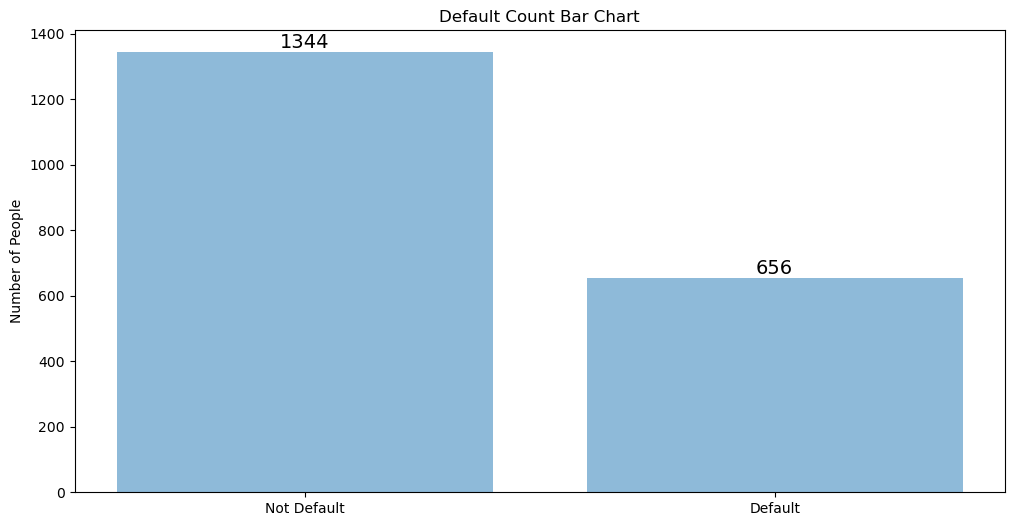

0    1344
1     656
Name: 1.Default, dtype: int64
Default rate of the training set is : 32.80%


In [11]:
# 统计违约和未违约人数
default_counts = train_data['1.Default'].value_counts()

# 绘制柱状图
plt.figure(figsize=(12, 6))
x_labels = ['Not Default', 'Default']
x_pos = np.arange(len(x_labels))
plt.bar(x_pos, default_counts, align='center', alpha=0.5)
plt.xticks(x_pos, x_labels)
plt.ylabel('Number of People')
plt.title('Default Count Bar Chart')
plt.text(x_pos[0], default_counts[0], str(default_counts[0]), ha='center', va='bottom', fontsize=14)
plt.text(x_pos[1], default_counts[1], str(default_counts[1]), ha='center', va='bottom', fontsize=14)
plt.show()

# 输出违约和未违约人数
print(default_counts)

# 计算违约人数占比
default_rate = train_data['1.Default'].mean()

# 输出违约人数占比
print(f"Default rate of the training set is : {default_rate:.2%}")


### 2.2 相关性分析

<AxesSubplot:>

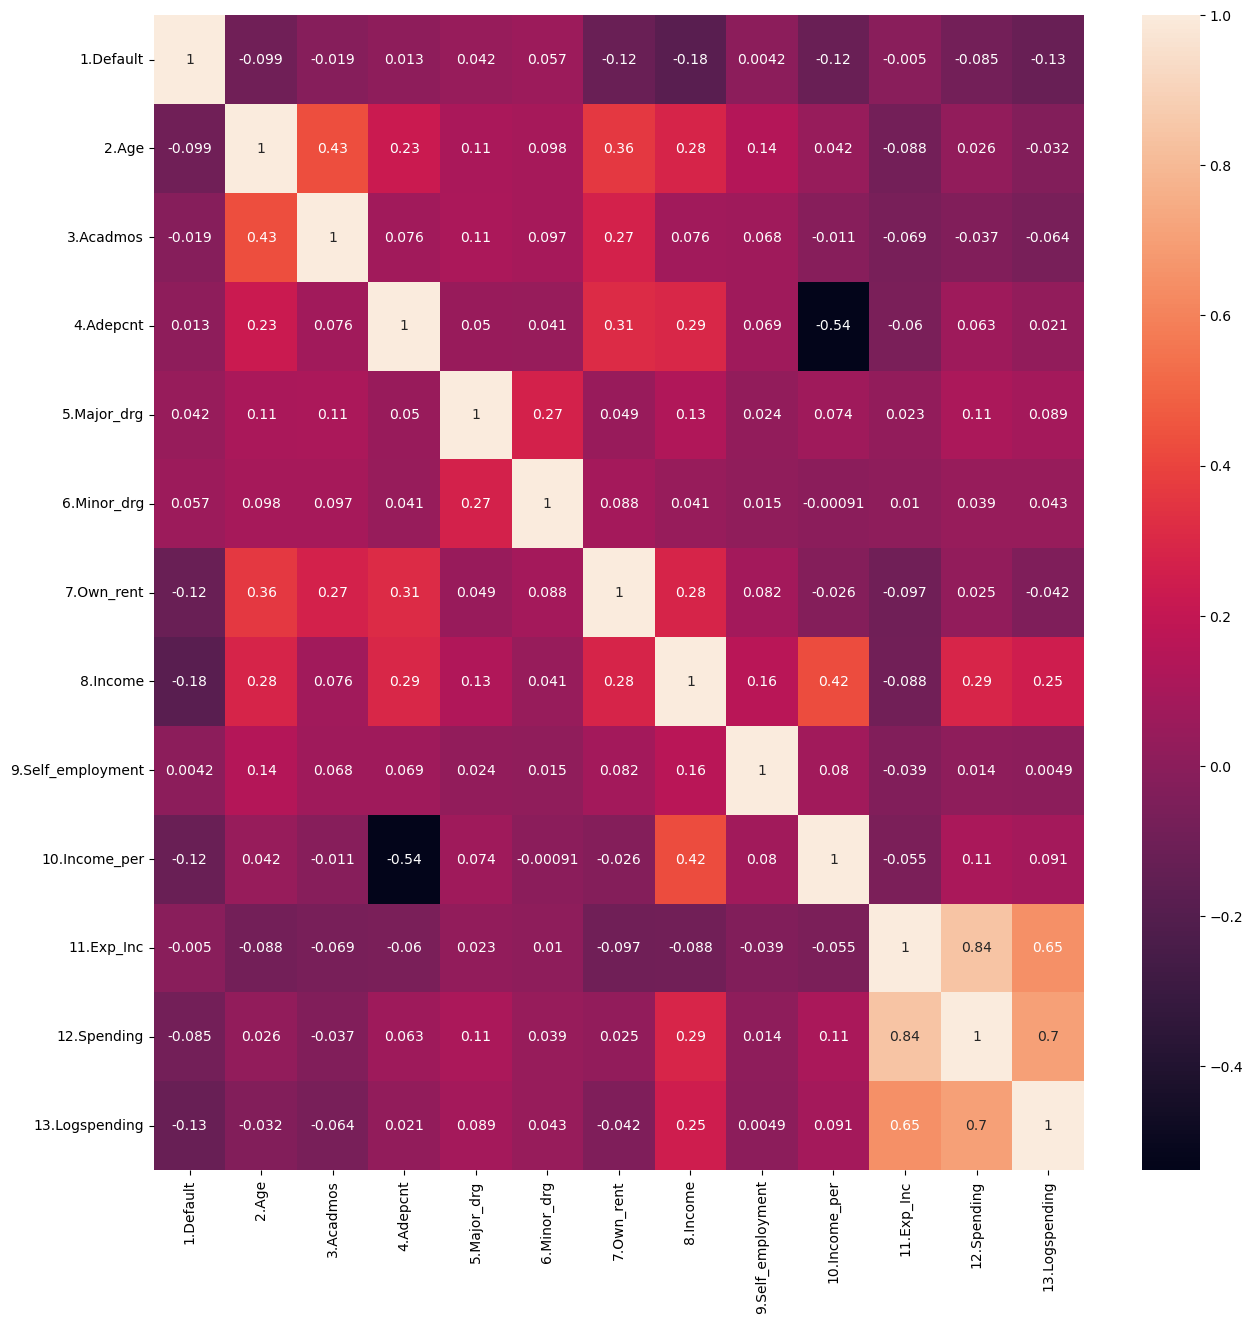

In [12]:
#checking correlation 
plt.figure(figsize=(15,15))
sns.heatmap(train_data.corr(),annot=True)

In [13]:
# 计算是否违约与其他特征之间的相关系数
correlations = train_data.corr()['1.Default'].sort_values()

# 输出相关系数
print(correlations)

8.Income            -0.180852
13.Logspending      -0.125249
10.Income_per       -0.122080
7.Own_rent          -0.117935
2.Age               -0.099428
12.Spending         -0.085108
3.Acadmos           -0.018702
11.Exp_Inc          -0.005003
9.Self_employment    0.004223
4.Adepcnt            0.013190
5.Major_drg          0.042391
6.Minor_drg          0.057372
1.Default            1.000000
Name: 1.Default, dtype: float64


In [14]:
# 计算是否违约与其他特征之间的相关系数（按照相关系数的绝对值从大到小排列）
correlations = train_data.corr()['1.Default'].abs().sort_values(ascending=False)

# 输出相关系数
for col, corr in correlations.items():
    print(f'{col}: {corr:.3f}')

1.Default: 1.000
8.Income: 0.181
13.Logspending: 0.125
10.Income_per: 0.122
7.Own_rent: 0.118
2.Age: 0.099
12.Spending: 0.085
6.Minor_drg: 0.057
5.Major_drg: 0.042
3.Acadmos: 0.019
4.Adepcnt: 0.013
11.Exp_Inc: 0.005
9.Self_employment: 0.004


从default的相关系数可以看出：
收入与是否违约的关联性最强
总体来说，数据集中的12个特征与是否违约的关联性并无明显强相关性

#### 2.2.1 探索收入和违约之间的关系

In [15]:
train_data["8.Income"].describe()

count    2000.000000
mean     2501.517500
std      1269.471783
min       208.333333
25%      1666.666667
50%      2166.666667
75%      2916.666667
max      8333.250000
Name: 8.Income, dtype: float64

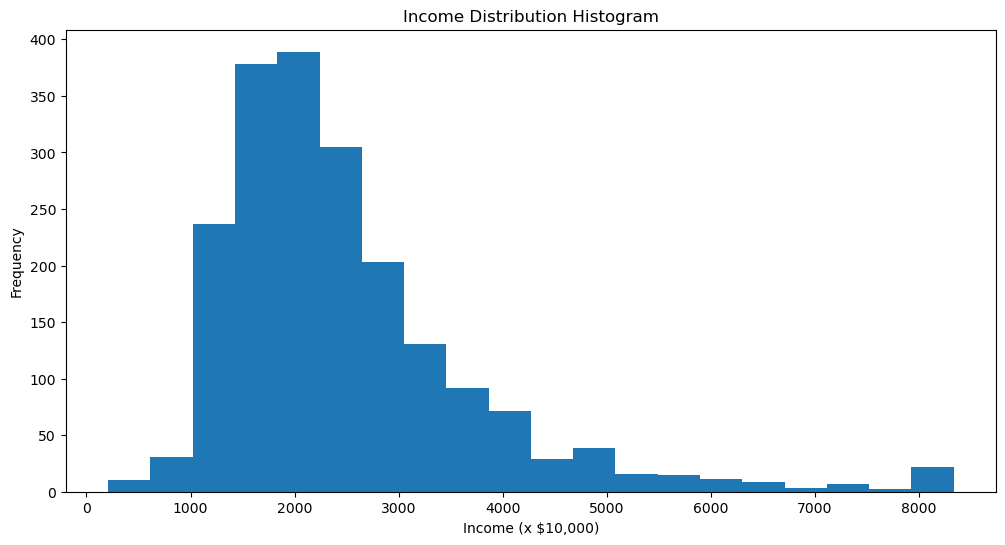

In [16]:
# 创建收入分布直方图
plt.figure(figsize=(12, 6))
plt.hist(train_data['8.Income'], bins=20)
plt.xlabel('Income (x $10,000)')
plt.ylabel('Frequency')
plt.title('Income Distribution Histogram')
plt.show()

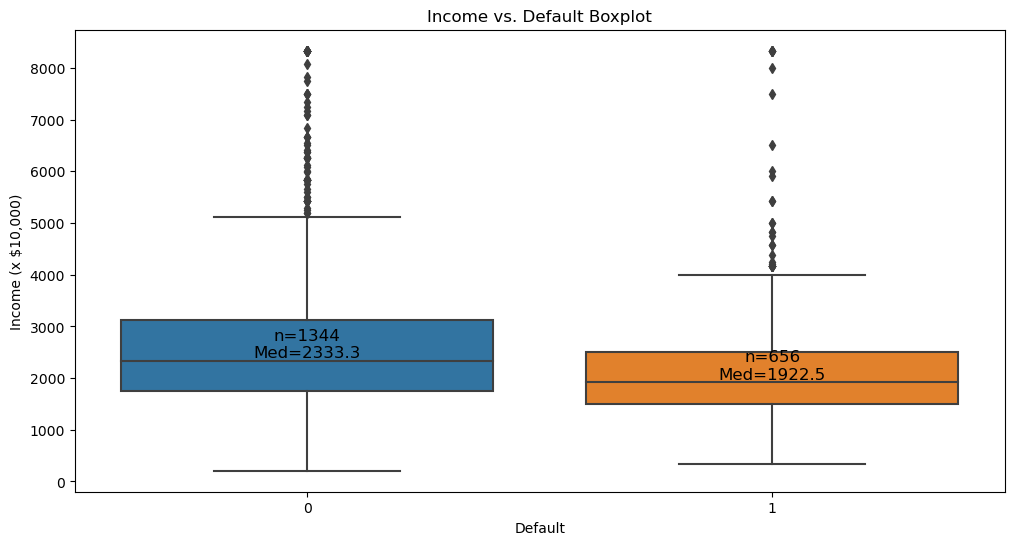

In [17]:
# 创建箱形图
plt.figure(figsize=(12, 6))
sns.boxplot(x='1.Default', y='8.Income', data=train_data)
plt.xlabel('Default')
plt.ylabel('Income (x $10,000)')
plt.title('Income vs. Default Boxplot')

# 计算每组的数据数量和中位数
group_sizes = train_data.groupby('1.Default').size().values
medians = train_data.groupby('1.Default')['8.Income'].median().values

# 在图形上添加注释
for i in range(len(group_sizes)):
    plt.text(i, medians[i] + 0.3, f"n={group_sizes[i]}\nMed={medians[i]:.1f}", ha='center', va='bottom', fontsize=12)

plt.show()

根据箱形图，违约组的收入分布的中位数明显低于未违约组的收入分布的中位数。这可能表明，收入水平较低的人更有可能违约。

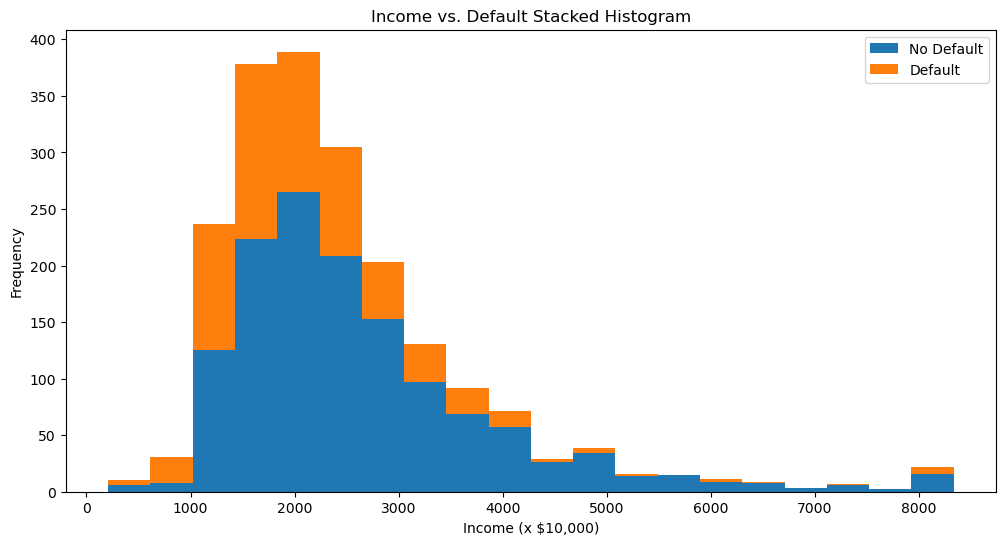

Income vs. Default Statistics:
            count         mean          std         min     25%          50%  \
1.Default                                                                      
0          1344.0  2661.875248  1330.026923  208.333333  1750.0  2333.333333   
1           656.0  2172.979675  1063.200990  333.333333  1500.0  1922.500000   

              75%      max  
1.Default                   
0          3125.0  8333.25  
1          2500.0  8333.25  
Income vs. Default Ratios:
8.Income
(208.333, 1111.102]     0.641509
(1111.102, 2013.87]     0.403553
(2013.87, 2916.639]     0.310631
(7430.481, 8333.25]     0.250000
(2916.639, 3819.407]    0.248466
(3819.407, 4722.176]    0.179245
(4722.176, 5624.944]    0.120690
(5624.944, 6527.713]    0.107143
(6527.713, 7430.481]    0.000000
Name: 1.Default, dtype: float64


In [18]:
# 创建堆积直方图
plt.figure(figsize=(12, 6))
plt.hist([train_data[train_data['1.Default']==0]['8.Income'], train_data[train_data['1.Default']==1]['8.Income']], bins=20, stacked=True, label=['No Default', 'Default'])
plt.xlabel('Income (x $10,000)')
plt.ylabel('Frequency')
plt.title('Income vs. Default Stacked Histogram')
plt.legend()
plt.show()

# 打印相关信息
print('Income vs. Default Statistics:')
print(train_data.groupby('1.Default')['8.Income'].describe())

# 将收入分为多个区间
bins = np.linspace(train_data['8.Income'].min(), train_data['8.Income'].max(), 10)

# 根据收入区间计算每个区间内的违约比例
default_ratios = train_data.groupby(pd.cut(train_data['8.Income'], bins))['1.Default'].mean()

# 按违约比例从大到小排序
default_ratios = default_ratios.sort_values(ascending=False)

# 打印每个收入区间内的违约比例
print('Income vs. Default Ratios:')
print(default_ratios)


2.2.2 年龄数据分析

In [19]:
train_data['2.Age'].describe()

count    2000.000000
mean       33.622958
std        10.535333
min         0.000000
25%        25.416666
50%        31.333334
75%        40.250000
max        86.833336
Name: 2.Age, dtype: float64

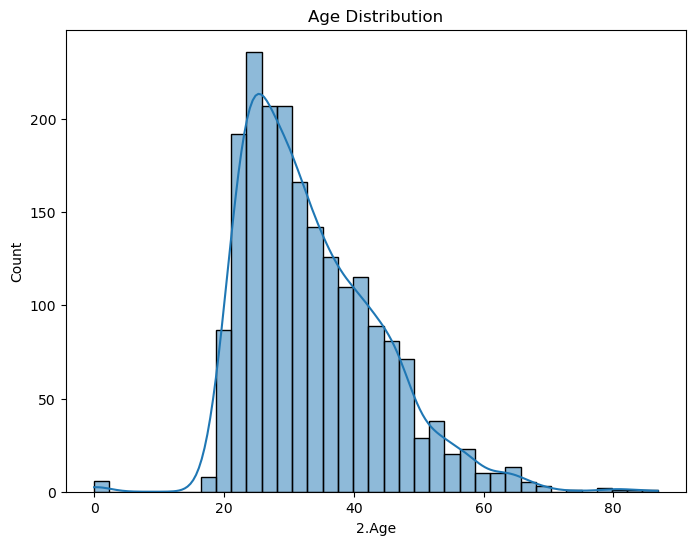

In [20]:
plt.figure(figsize=(8, 6))
sns.histplot(train_data['2.Age'], kde=True)
plt.title('Age Distribution')
plt.show()

In [21]:
# Count the number of rows with age less than 18
under_18_count = len(train_data[train_data['2.Age'] < 18])
print(f"Number of rows with age less than 18 is: {under_18_count}")

Number of rows with age less than 18 is: 6


In [22]:
# Remove rows with age less than 18
train_data = train_data[train_data['2.Age'] >= 18]

删除年龄中的异常值：根据尝试，信用卡需要年龄大于18岁方可办理，但是数据集中存在年龄为0的数据，这与常识不符，所以剔除年龄小于18的数据

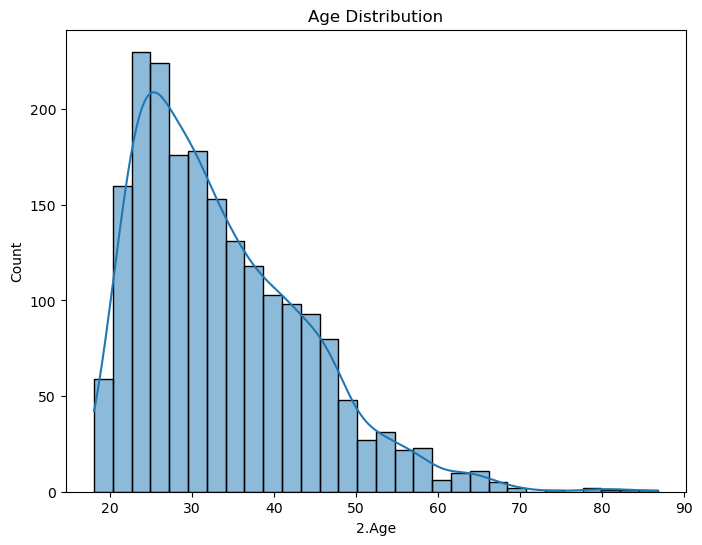

In [23]:
#绘制删除异常值后的年龄分布柱状图
plt.figure(figsize=(8, 6))
sns.histplot(train_data['2.Age'], kde=True)
plt.title('Age Distribution')
plt.show()

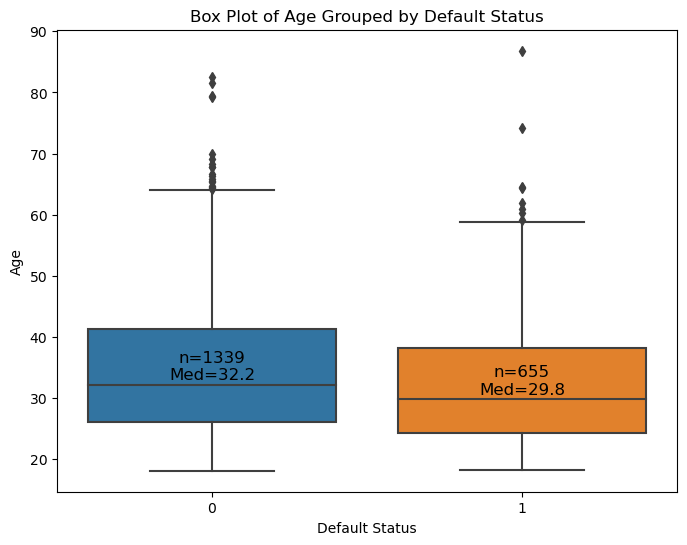

In [24]:
# Box plot of Age grouped by Default status
plt.figure(figsize=(8, 6))
sns.boxplot(x='1.Default', y='2.Age', data=train_data)
plt.title('Box Plot of Age Grouped by Default Status')
plt.xlabel('Default Status')
plt.ylabel('Age')

# 计算每组的数据数量和中位数
group_sizes = train_data.groupby('1.Default').size().values
medians = train_data.groupby('1.Default')['2.Age'].median().values

# 在图形上添加注释
for i in range(len(group_sizes)):
    plt.text(i, medians[i] + 0.3, f"n={group_sizes[i]}\nMed={medians[i]:.1f}", ha='center', va='bottom', fontsize=12)

plt.show()


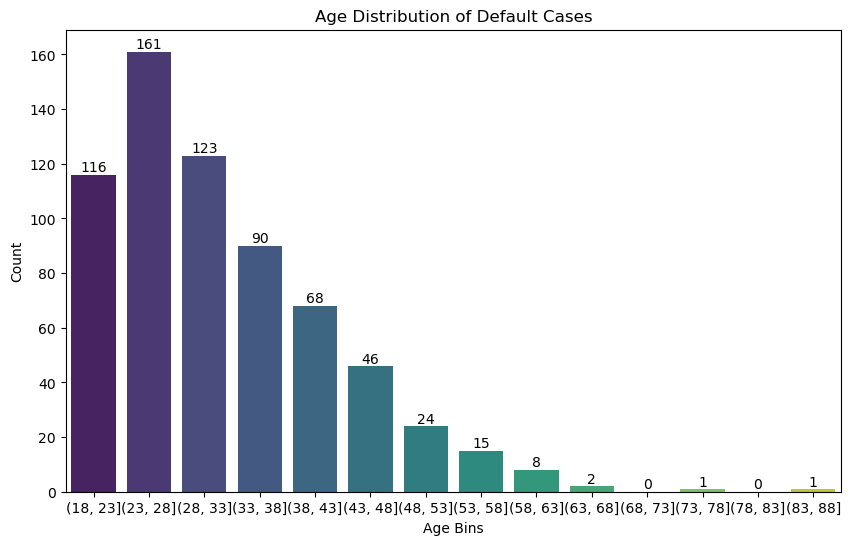

In [25]:
# Filter data to include only the default cases
default_data = train_data[train_data['1.Default'] == 1].copy()

# Create age bins
bins = list(range(18, int(default_data['2.Age'].max()) + 5, 5))
default_data.loc[:, 'age_bins'] = pd.cut(default_data['2.Age'], bins=bins)

# Count the number of defaults in each age bin
age_default_counts = default_data['age_bins'].value_counts().sort_index()

# Plot the bar chart with value annotations
plt.figure(figsize=(10, 6))
ax = sns.barplot(x=age_default_counts.index, y=age_default_counts.values, palette='viridis')
plt.title('Age Distribution of Default Cases')
plt.xlabel('Age Bins')
plt.ylabel('Count')

# Add value annotations
for i, count in enumerate(age_default_counts.values):
    ax.text(i, count, str(count), ha='center', va='bottom', fontsize=10)

plt.show()

根据上述直方图和箱线图所示，我们可以看出，违约人群主要为青年人和中年人，老年人的违约数量较少

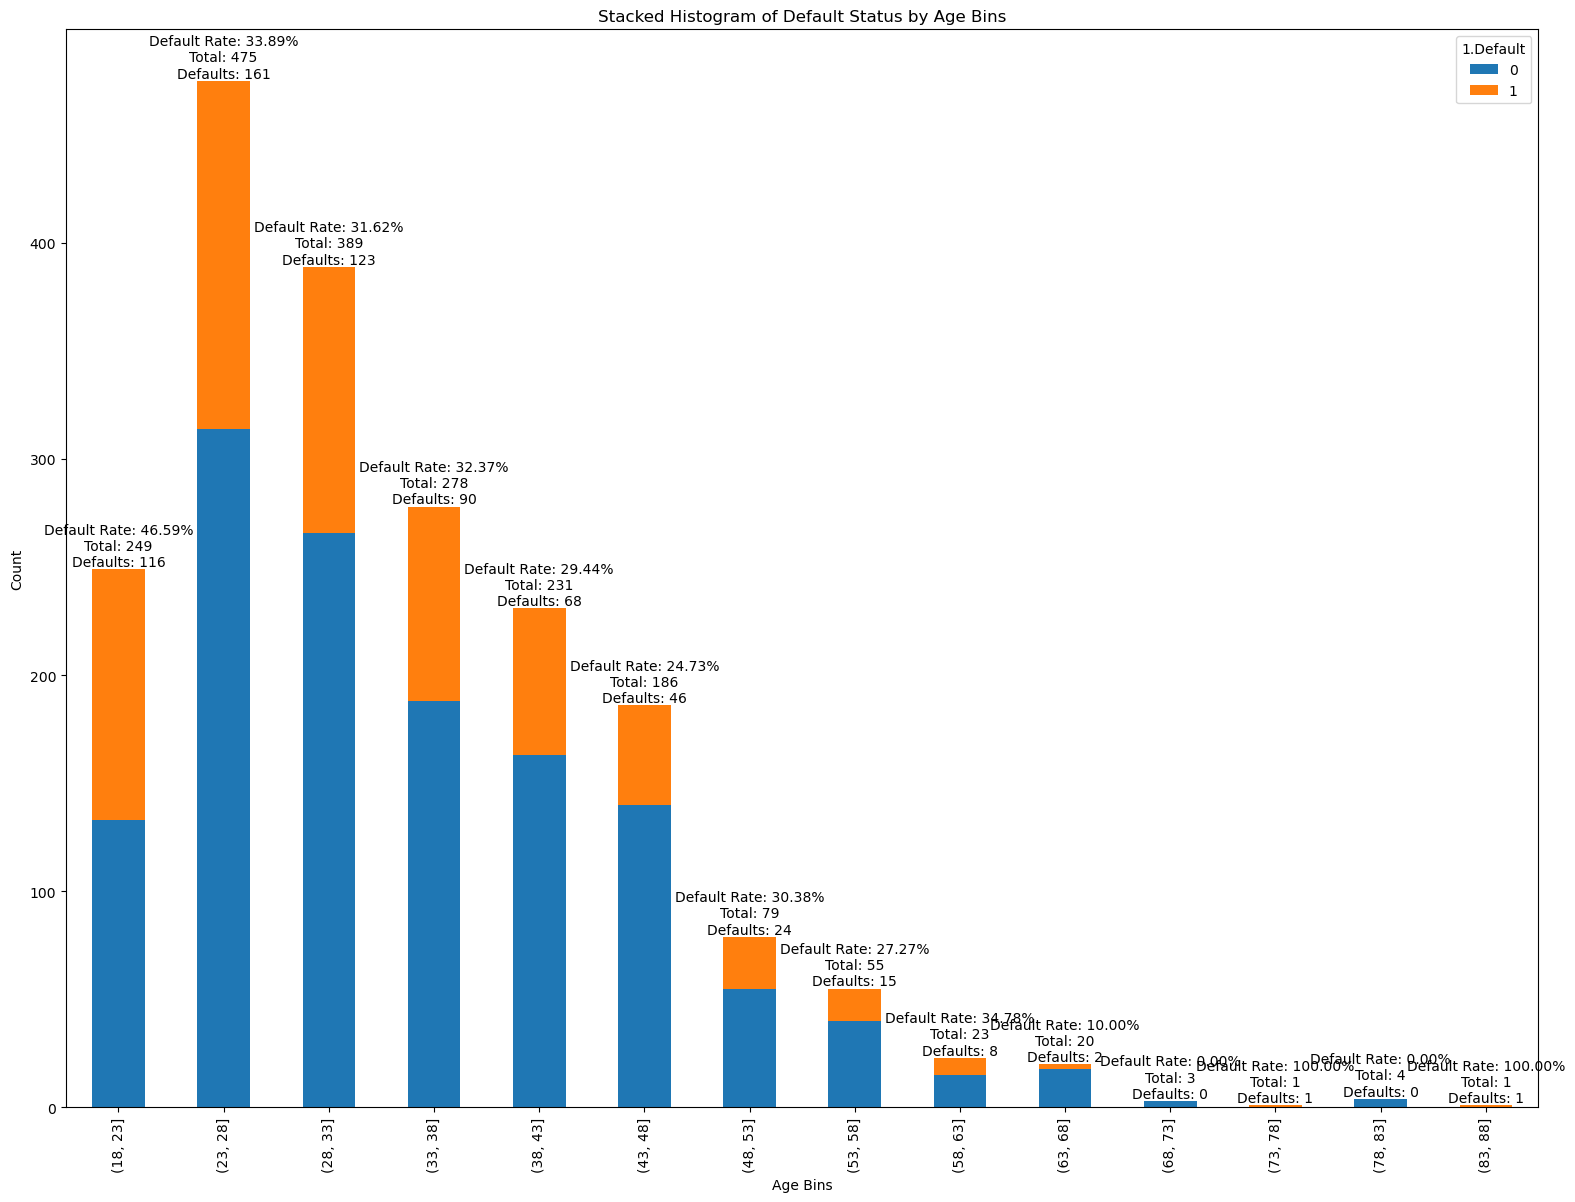

Sorted by Age Bins:
1.Default default_rate  total    1
age_bins                          
(18, 23]        46.59%    249  116
(23, 28]        33.89%    475  161
(28, 33]        31.62%    389  123
(33, 38]        32.37%    278   90
(38, 43]        29.44%    231   68
(43, 48]        24.73%    186   46
(48, 53]        30.38%     79   24
(53, 58]        27.27%     55   15
(58, 63]        34.78%     23    8
(63, 68]        10.00%     20    2
(68, 73]         0.00%      3    0
(73, 78]       100.00%      1    1
(78, 83]         0.00%      4    0
(83, 88]       100.00%      1    1


In [26]:
# Create age bins
bins = list(range(18, int(train_data['2.Age'].max()) + 5, 5))
train_data['age_bins'] = pd.cut(train_data['2.Age'], bins=bins)

# Calculate default and non-default counts for each age bin
age_bin_counts = train_data.groupby(['age_bins', '1.Default']).size().unstack(fill_value=0)
age_bin_counts['total'] = age_bin_counts[0] + age_bin_counts[1]
age_bin_counts['default_rate'] = age_bin_counts[1] / age_bin_counts['total']

# Plot the stacked bar chart
ax = age_bin_counts[[0, 1]].plot(kind='bar', stacked=True, figsize=(19, 14))
plt.title('Stacked Histogram of Default Status by Age Bins')
plt.xlabel('Age Bins')
plt.ylabel('Count')

# Add value annotations
for i, (total, defaults, rate) in enumerate(zip(age_bin_counts['total'], age_bin_counts[1], age_bin_counts['default_rate'])):
    text = f"Default Rate: {rate:.2%}\nTotal: {total}\nDefaults: {defaults}"
    ax.text(i, total, text, ha='center', va='bottom', fontsize=10)

plt.show()

# Print default rate, total count, and default count for each age bin
print("Sorted by Age Bins:")
age_bin_counts['default_rate'] = age_bin_counts['default_rate'].apply(lambda x: f"{x:.2%}")
print(age_bin_counts[['default_rate', 'total', 1]])


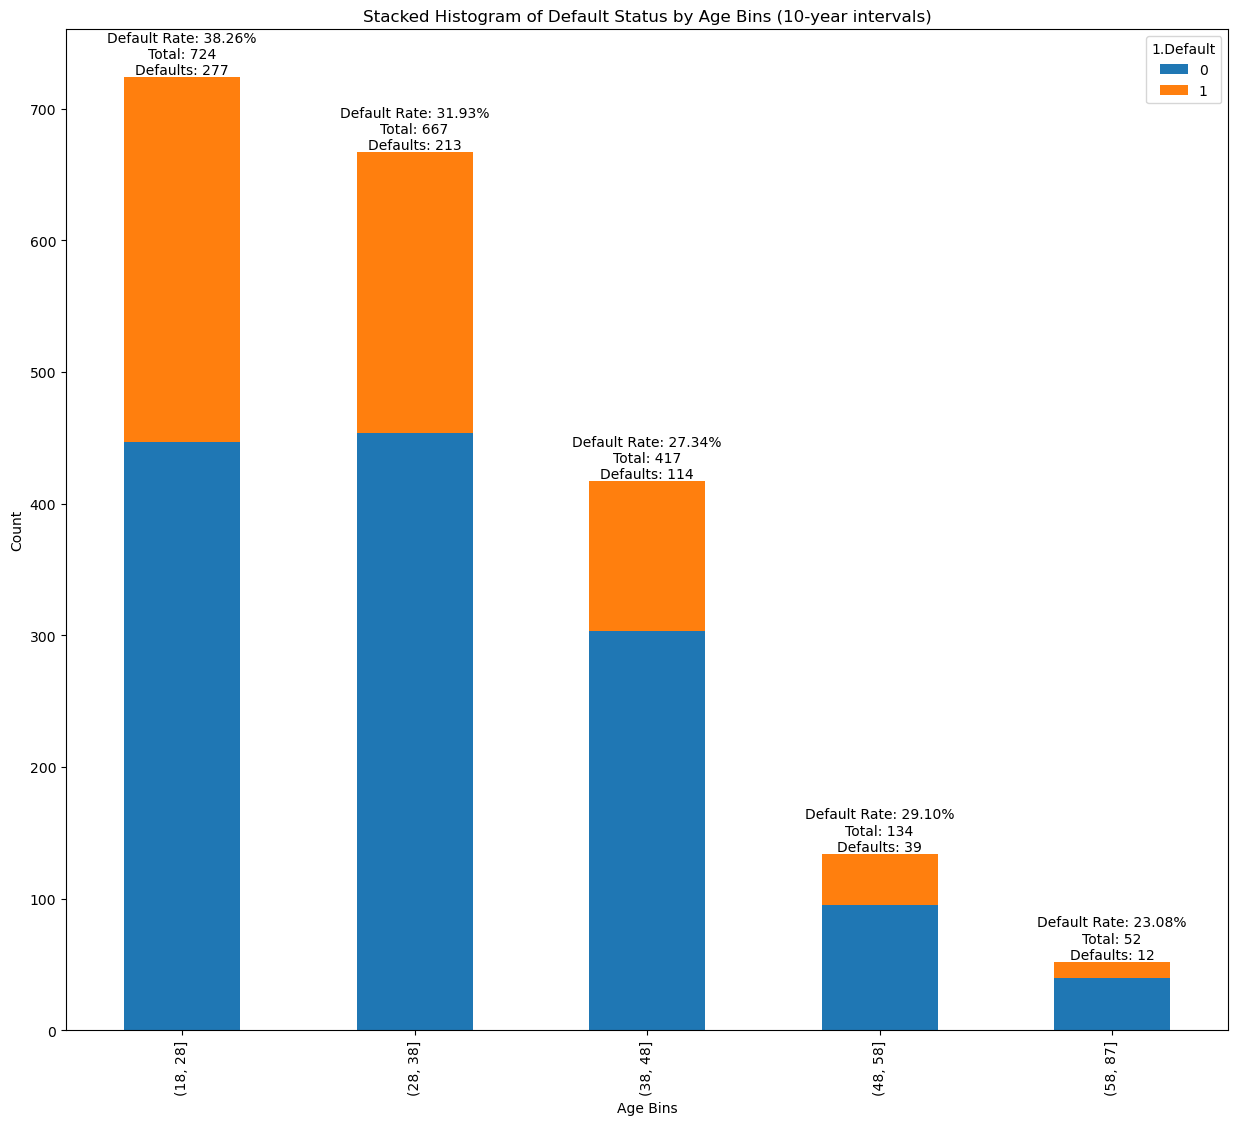

Sorted by Age Bins:
1.Default default_rate  total    1
age_bins                          
(18, 28]        38.26%    724  277
(28, 38]        31.93%    667  213
(38, 48]        27.34%    417  114
(48, 58]        29.10%    134   39
(58, 87]        23.08%     52   12


In [27]:
# Create age bins
bins = list(range(18, 61, 10)) + [int(train_data['2.Age'].max())+1]
train_data['age_bins'] = pd.cut(train_data['2.Age'], bins=bins)

# Calculate default and non-default counts for each age bin
age_bin_counts = train_data.groupby(['age_bins', '1.Default']).size().unstack(fill_value=0)
age_bin_counts['total'] = age_bin_counts[0] + age_bin_counts[1]
age_bin_counts['default_rate'] = age_bin_counts[1] / age_bin_counts['total']

# Plot the stacked bar chart
ax = age_bin_counts[[0, 1]].plot(kind='bar', stacked=True, figsize=(15, 13))
plt.title('Stacked Histogram of Default Status by Age Bins (10-year intervals)')
plt.xlabel('Age Bins')
plt.ylabel('Count')

# Add value annotations
for i, (total, defaults, rate) in enumerate(zip(age_bin_counts['total'], age_bin_counts[1], age_bin_counts['default_rate'])):
    text = f"Default Rate: {rate:.2%}\nTotal: {total}\nDefaults: {defaults}"
    ax.text(i, total, text, ha='center', va='bottom', fontsize=10)

plt.show()

# Print default rate, total count, and default count for each age bin
print("Sorted by Age Bins:")
age_bin_counts['default_rate'] = age_bin_counts['default_rate'].apply(lambda x: f"{x:.2%}")
print(age_bin_counts[['default_rate', 'total', 1]])


### 探索own-rent与是否违约之间的关联性


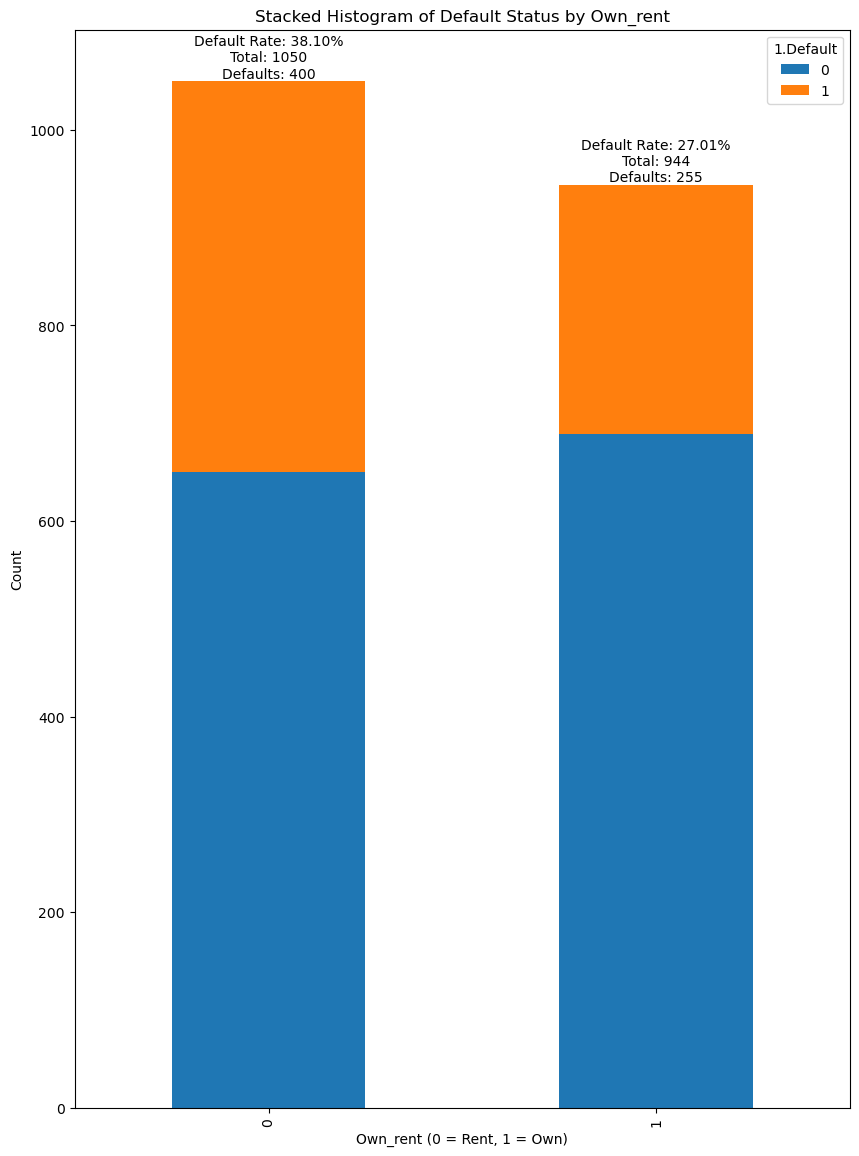

Sorted by Own_rent:
1.Default  default_rate  total    1
7.Own_rent                         
0                38.10%   1050  400
1                27.01%    944  255


In [28]:
# Calculate default and non-default counts for each Own_rent category
own_rent_counts = train_data.groupby(['7.Own_rent', '1.Default']).size().unstack(fill_value=0)
own_rent_counts['total'] = own_rent_counts[0] + own_rent_counts[1]
own_rent_counts['default_rate'] = own_rent_counts[1] / own_rent_counts['total']

# Plot the stacked bar chart
ax = own_rent_counts[[0, 1]].plot(kind='bar', stacked=True, figsize=(10, 14))
plt.title('Stacked Histogram of Default Status by Own_rent')
plt.xlabel('Own_rent (0 = Rent, 1 = Own)')
plt.ylabel('Count')

# Add value annotations
for i, (total, defaults, rate) in enumerate(zip(own_rent_counts['total'], own_rent_counts[1], own_rent_counts['default_rate'])):
    text = f"Default Rate: {rate:.2%}\nTotal: {total}\nDefaults: {defaults}"
    ax.text(i, total, text, ha='center', va='bottom', fontsize=10)

plt.show()

# Print default rate, total count, and default count for each Own_rent category
print("Sorted by Own_rent:")
own_rent_counts['default_rate'] = own_rent_counts['default_rate'].apply(lambda x: f"{x:.2%}")
print(own_rent_counts[['default_rate', 'total', 1]])


从图中可知，拥有房子的人群信用违约的比例小于租房人群信用违约的比例

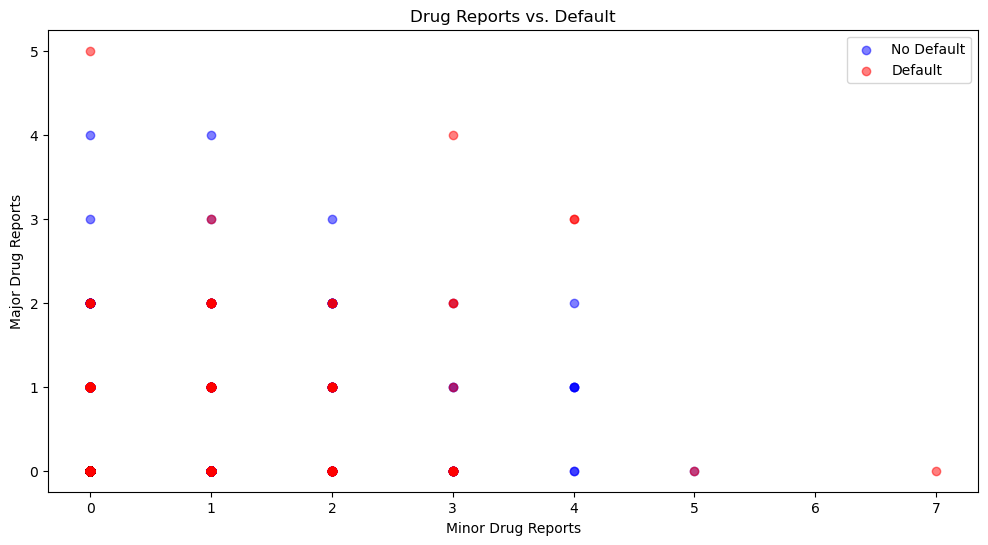

In [29]:
# 绘制散点图，其中违约样本用红色表示，正常样本用蓝色表示
plt.figure(figsize=(12, 6))
plt.scatter(train_data[train_data['1.Default'] == 0]['6.Minor_drg'], train_data[train_data['1.Default'] == 0]['5.Major_drg'], color='blue', alpha=0.5, label='No Default')
plt.scatter(train_data[train_data['1.Default'] == 1]['6.Minor_drg'], train_data[train_data['1.Default'] == 1]['5.Major_drg'], color='red', alpha=0.5, label='Default')
plt.xlabel('Minor Drug Reports')
plt.ylabel('Major Drug Reports')
plt.title('Drug Reports vs. Default')
plt.legend()
plt.show()


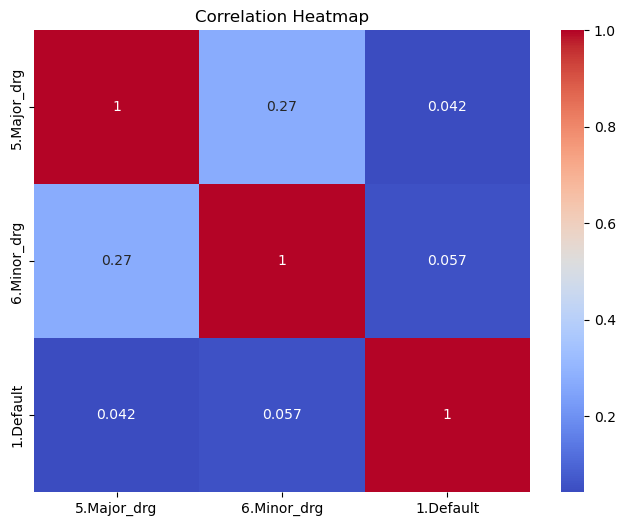

In [30]:
# 计算5.Major_drg和6.Minor_drg的相关系数
corr = train_data[['5.Major_drg', '6.Minor_drg', '1.Default']].corr()

# 绘制热力图
plt.figure(figsize=(8, 6))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()


In [31]:
train_data['5.Major_drg'].unique()

array([0, 1, 2, 3, 4, 5])

In [32]:
train_data['6.Minor_drg'].unique()

array([0, 1, 2, 3, 4, 5, 7])

In [33]:
# 统计不同的 Major_drg 对应的违约比例
major_drg_default_ratio = train_data.groupby('5.Major_drg')['1.Default'].mean()


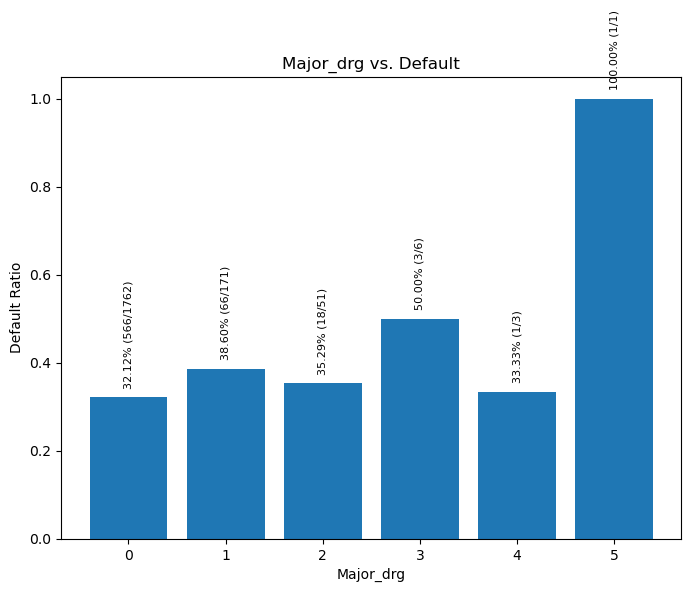

In [34]:
# 统计不同的 Major_drg 对应的违约人数和总人数
major_drg_default = train_data.groupby('5.Major_drg')['1.Default'].agg(['sum', 'count'])

# 计算每组 Major_drg 的违约比例
major_drg_default_ratio = major_drg_default['sum'] / major_drg_default['count']

# 绘制 Major_drg 和违约的关系图，并在每个 bar 上显示具体数据
plt.figure(figsize=(8, 6))
bars = plt.bar(major_drg_default_ratio.index.astype(str), major_drg_default_ratio.values)
for i, bar in enumerate(bars):
    plt.text(i, bar.get_height() + 0.02, f'{major_drg_default_ratio.values[i]:.2%} ({major_drg_default["sum"].values[i]}/{major_drg_default["count"].values[i]})',
             ha='center', va='bottom', rotation=90, fontsize=8)
plt.xlabel('Major_drg')
plt.ylabel('Default Ratio')
plt.title('Major_drg vs. Default')
plt.show()


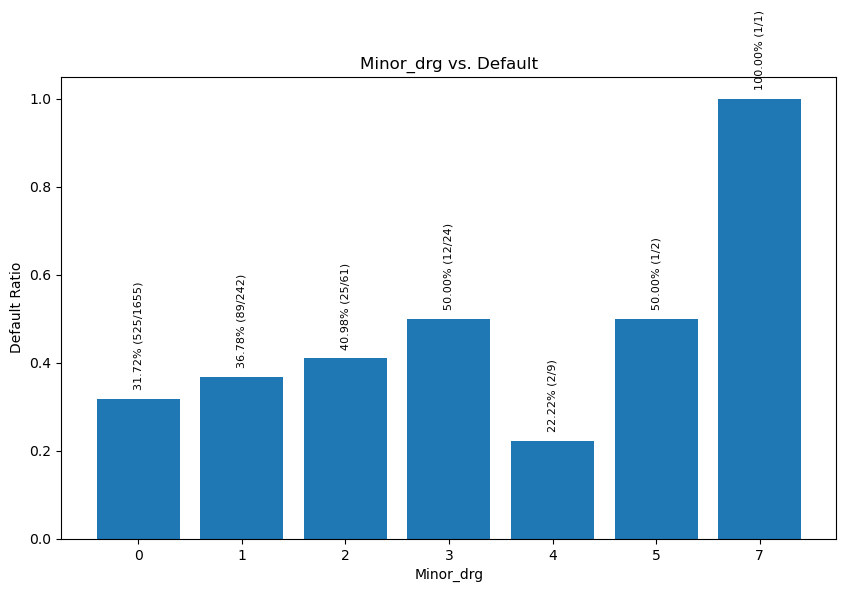

In [35]:
# 统计不同的 Minor_drg 对应的违约人数和总人数
minor_drg_default = train_data.groupby('6.Minor_drg')['1.Default'].agg(['sum', 'count'])

# 计算每组 Minor_drg 的违约比例
minor_drg_default_ratio = minor_drg_default['sum'] / minor_drg_default['count']

# 绘制 Minor_drg 和违约的关系图，并在每个 bar 上显示具体数据
plt.figure(figsize=(10, 6))
bars = plt.bar(minor_drg_default_ratio.index.astype(str), minor_drg_default_ratio.values)
for i, bar in enumerate(bars):
    plt.text(i, bar.get_height() + 0.02, f'{minor_drg_default_ratio.values[i]:.2%} ({minor_drg_default["sum"].values[i]}/{minor_drg_default["count"].values[i]})',
             ha='center', va='bottom', rotation=90, fontsize=8)
plt.xlabel('Minor_drg')
plt.ylabel('Default Ratio')
plt.title('Minor_drg vs. Default')
plt.show()


## Feature Engineer

In [36]:
train_data.head()

,1.Default,2.Age,3.Acadmos,4.Adepcnt,5.Major_drg,6.Minor_drg,7.Own_rent,8.Income,9.Self_employment,10.Income_per,11.Exp_Inc,12.Spending,13.Logspending,age_bins
0,0,37.583332,6,0,0,0,1,2916.666667,1,39000.0,0.116674,340.300227,5.829828,"(28, 38]"
1,1,23.750000,6,0,1,0,1,8333.250000,0,99999.0,0.043130,359.416667,5.884482,"(18, 28]"
2,0,47.833332,96,1,0,1,1,3333.333333,0,20000.0,0.051814,172.715001,5.151643,"(38, 48]"
3,0,22.916666,4,0,0,0,0,2100.000000,0,25200.0,0.035337,74.208336,4.306877,"(18, 28]"
4,0,24.000000,64,0,0,0,0,1541.666667,0,18500.0,0.168817,260.259172,5.561678,"(18, 28]"


In [37]:
test_data.head()

,AGE,ACADMOS,ADEPCNT,MAJORDRG,MINORDRG,OWNRENT,INCOME,SELFEMPL,INCPER,EXP_INC,SPENDING,LOGSPEND
0,31.750000,54,1,0,0,0,2000.000000,0,12000.0,0.186958,373.916656,5.924033
1,29.000000,18,0,0,0,1,2916.666667,1,35000.0,0.094249,274.891664,5.616377
2,38.666668,122,4,0,4,1,2400.000000,0,5760.0,0.225829,541.990006,6.295248
3,21.000000,16,0,0,0,0,1500.000000,0,18000.0,0.053668,80.502503,4.388288
4,20.916666,4,0,0,0,0,1041.666667,0,12500.0,0.169784,176.858328,5.175349


In [38]:
#删除训练集和测试集中的age_bins列
train_data = train_data.drop("age_bins", axis=1)
train_data.head()

,1.Default,2.Age,3.Acadmos,4.Adepcnt,5.Major_drg,6.Minor_drg,7.Own_rent,8.Income,9.Self_employment,10.Income_per,11.Exp_Inc,12.Spending,13.Logspending
0,0,37.583332,6,0,0,0,1,2916.666667,1,39000.0,0.116674,340.300227,5.829828
1,1,23.750000,6,0,1,0,1,8333.250000,0,99999.0,0.043130,359.416667,5.884482
2,0,47.833332,96,1,0,1,1,3333.333333,0,20000.0,0.051814,172.715001,5.151643
3,0,22.916666,4,0,0,0,0,2100.000000,0,25200.0,0.035337,74.208336,4.306877
4,0,24.000000,64,0,0,0,0,1541.666667,0,18500.0,0.168817,260.259172,5.561678


In [39]:
# Rename each column for better reading and understanding
# 13 features in total
test_data.rename(columns={
    'AGE': '2.Age',
    'ACADMOS': '3.Acadmos',
    'ADEPCNT': '4.Adepcnt',
    'MAJORDRG': '5.Major_drg',
    'MINORDRG': '6.Minor_drg',
    'OWNRENT': '7.Own_rent',
    'INCOME': '8.Income',
    'SELFEMPL': '9.Self_employment',
    'INCPER': '10.Income_per',
    'EXP_INC': '11.Exp_Inc',
    'SPENDING': '12.Spending',
    'LOGSPEND ': '13.Logspending'
}, inplace=True)

test_data.head()

,2.Age,3.Acadmos,4.Adepcnt,5.Major_drg,6.Minor_drg,7.Own_rent,8.Income,9.Self_employment,10.Income_per,11.Exp_Inc,12.Spending,13.Logspending
0,31.750000,54,1,0,0,0,2000.000000,0,12000.0,0.186958,373.916656,5.924033
1,29.000000,18,0,0,0,1,2916.666667,1,35000.0,0.094249,274.891664,5.616377
2,38.666668,122,4,0,4,1,2400.000000,0,5760.0,0.225829,541.990006,6.295248
3,21.000000,16,0,0,0,0,1500.000000,0,18000.0,0.053668,80.502503,4.388288
4,20.916666,4,0,0,0,0,1041.666667,0,12500.0,0.169784,176.858328,5.175349


In [40]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1994 entries, 0 to 1999
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   1.Default          1994 non-null   int64  
 1   2.Age              1994 non-null   float64
 2   3.Acadmos          1994 non-null   int64  
 3   4.Adepcnt          1994 non-null   int64  
 4   5.Major_drg        1994 non-null   int64  
 5   6.Minor_drg        1994 non-null   int64  
 6   7.Own_rent         1994 non-null   int64  
 7   8.Income           1994 non-null   float64
 8   9.Self_employment  1994 non-null   int64  
 9   10.Income_per      1994 non-null   float64
 10  11.Exp_Inc         1994 non-null   float64
 11  12.Spending        1994 non-null   float64
 12  13.Logspending     1994 non-null   float64
dtypes: float64(6), int64(7)
memory usage: 282.6 KB


## 数据标准化

In [41]:
#导入所需的库
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [42]:
# 划分训练集和验证集
X_train_data = train_data.drop(["1.Default"], axis=1)
y_train_data = train_data["1.Default"]
X_train, X_val, y_train, y_val = train_test_split(X_train_data, y_train_data, test_size=0.2, random_state=42)

In [43]:
# 标准化处理分割后的训练集及测试集
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.fit_transform(X_val)
test_data_scaled = scaler.fit_transform(test_data)

### 主成份分析（PCA）

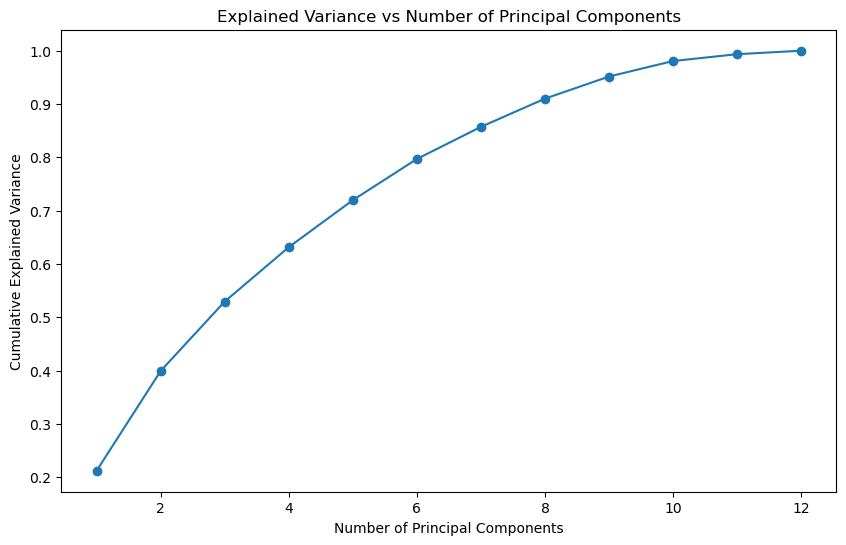

In [44]:
from sklearn.decomposition import PCA

# 创建PCA对象
pca = PCA()

# 拟合PCA模型
pca.fit(X_train_scaled)

# 绘制解释方差比（explained_variance_ratio_）以确定保留的主成分数量
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(pca.explained_variance_ratio_) + 1), np.cumsum(pca.explained_variance_ratio_), marker='o')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Explained Variance vs Number of Principal Components')
plt.show()


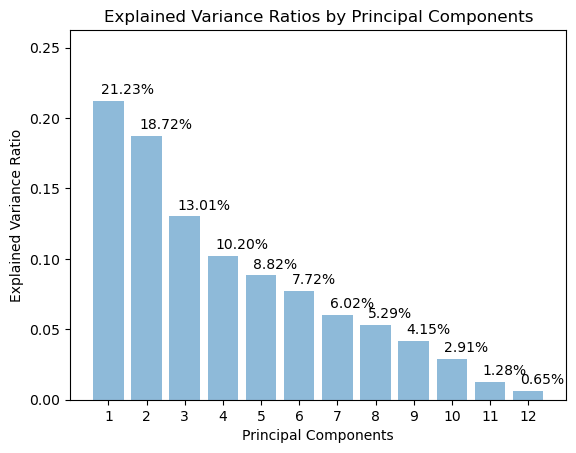

In [45]:
# Calculate explained variance ratios
explained_variance_ratio = pca.explained_variance_ratio_

# Plot the explained variance ratios as a bar chart
fig, ax = plt.subplots()
bar_positions = np.arange(len(explained_variance_ratio)) + 1
ax.bar(bar_positions, explained_variance_ratio, align='center', alpha=0.5)

# Add annotations on top of each bar
for i in range(len(explained_variance_ratio)):
    ax.text(bar_positions[i] - 0.2, explained_variance_ratio[i] + 0.005, f"{explained_variance_ratio[i]:.2%}")

# Set x-axis labels and limit
ax.set_xticks(bar_positions)
ax.set_xlim(0, len(explained_variance_ratio) + 1)

# Set y-axis label and limit
ax.set_ylim(0, max(explained_variance_ratio) + 0.05)

# Set plot title and labels
ax.set_title("Explained Variance Ratios by Principal Components")
ax.set_xlabel("Principal Components")
ax.set_ylabel("Explained Variance Ratio")
plt.show()


In [46]:
'''# 选择保留的主成分数量
num_components = 9

# 创建新的PCA对象并指定主成分数量
pca = PCA(n_components=num_components)

# 对数据进行PCA转换
reduced_features = pca.fit_transform( )'''


'# 选择保留的主成分数量\nnum_components = 9\n\n# 创建新的PCA对象并指定主成分数量\npca = PCA(n_components=num_components)\n\n# 对数据进行PCA转换\nreduced_features = pca.fit_transform( )'

In [47]:
print(len(X_train))
print(len(X_val))
print(len(X_train)+len(X_val))

1595
399
1994


## 模型训练和预测

### 1.逻辑回归模型 LR model

In [48]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# 创建逻辑回归模型
lr = LogisticRegression(random_state=42, solver='liblinear')

# Hyperparameter tuning using GridSearchCV
param_grid = {
    'penalty': ['l1', 'l2'],
    'C': np.logspace(-4, 4, 20)
}

grid_search = GridSearchCV(lr, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train_scaled, y_train)

# Evaluate the best model
best_log_reg = grid_search.best_estimator_
y_val_pred = best_log_reg.predict(X_val_scaled)
val_accuracy = accuracy_score(y_val, y_val_pred)
print("Validation accuracy:", val_accuracy)

# Make predictions on the test set
y_test_pred = best_log_reg.predict(test_data_scaled)


# Prepare the submission file
submission = pd.DataFrame({'ID': test_data.index, 'DEFAULT': y_test_pred})
submission.to_csv('submission_LR_Grid.csv', index=False)

Validation accuracy: 0.6340852130325815


### Visualization: Confusion matrices and AUC curves

In [49]:
import itertools
from sklearn.metrics import roc_curve, auc, roc_auc_score, log_loss, accuracy_score, confusion_matrix

def plot_cm(ax, y_true, y_pred, classes, title, th=0.5, cmap=plt.cm.Blues):
    y_pred_labels = (y_pred>th).astype(int)
    
    cm = confusion_matrix(y_true, y_pred_labels)
    
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.set_title(title)

    tick_marks = np.arange(len(classes))
    ax.set_xticks(tick_marks)
    ax.set_yticks(tick_marks)
    ax.set_xticklabels(classes)
    ax.set_yticklabels(classes)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        ax.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
    ax.set_ylabel('True label')
    ax.set_xlabel('Predicted label')

def plot_auc(ax, y_train, y_train_pred, y_test, y_test_pred, th=0.5):

    y_train_pred_labels = (y_train_pred>th).astype(int)
    y_test_pred_labels  = (y_test_pred>th).astype(int)

    fpr_train, tpr_train, _ = roc_curve(y_train,y_train_pred)
    roc_auc_train = auc(fpr_train, tpr_train)
    acc_train = accuracy_score(y_train, y_train_pred_labels)

    fpr_test, tpr_test, _ = roc_curve(y_test,y_test_pred)
    roc_auc_test = auc(fpr_test, tpr_test)
    acc_test = accuracy_score(y_test, y_test_pred_labels)

    ax.plot(fpr_train, tpr_train)
    ax.plot(fpr_test, tpr_test)

    ax.plot([0, 1], [0, 1], 'k--')

    ax.set_xlim([0.0, 1.0])
    ax.set_ylim([0.0, 1.05])
    ax.set_xlabel('False Positive Rate')
    ax.set_ylabel('True Positive Rate')
    ax.set_title('ROC curve')
    
    train_text = 'train acc = {:.3f}, auc = {:.2f}'.format(acc_train, roc_auc_train)
    test_text = 'test acc = {:.3f}, auc = {:.2f}'.format(acc_test, roc_auc_test)
    ax.legend([train_text, test_text])

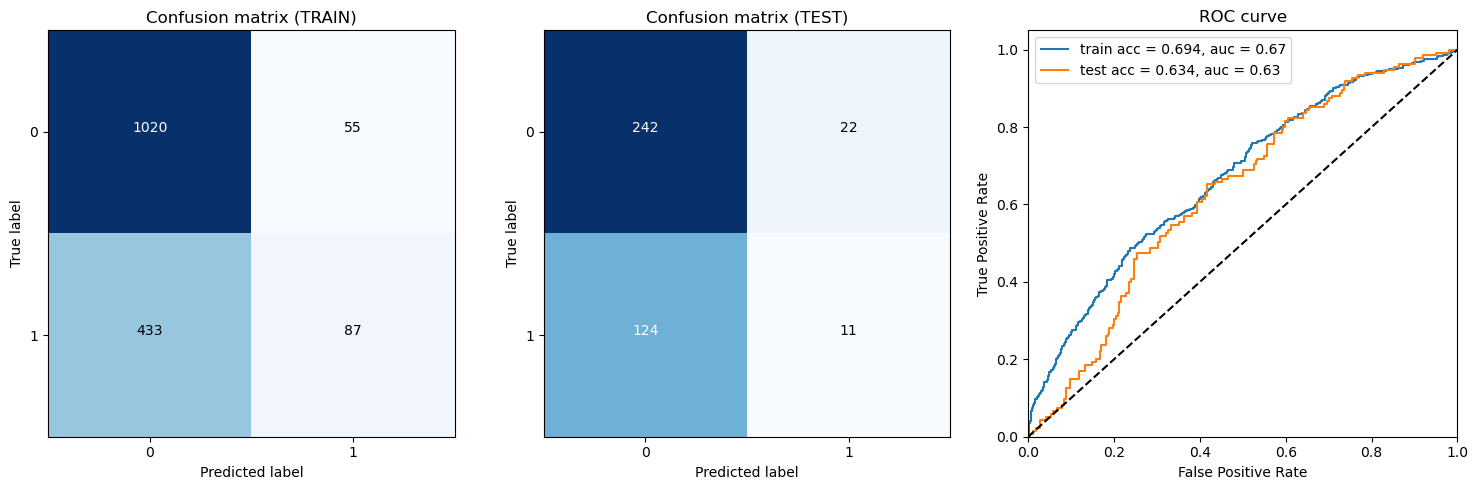

In [50]:
y_train_pred = best_log_reg.predict_proba(X_train_scaled)[:,1]
y_val_pred = best_log_reg.predict_proba(X_val_scaled)[:,1]

threshold = 0.5

y_train_pred_class = (y_train_pred > threshold).astype(int)
y_test_pred_class = (y_val_pred > threshold).astype(int)

fig,ax = plt.subplots(1,3)
fig.set_size_inches(15,5)

plot_cm(ax[0],  y_train, y_train_pred, [0,1], 'Confusion matrix (TRAIN)', threshold)
plot_cm(ax[1],  y_val, y_val_pred,   [0,1], 'Confusion matrix (TEST)', threshold)
plot_auc(ax[2], y_train, y_train_pred, y_val, y_val_pred, threshold)
    
plt.tight_layout()
plt.show()

### 2.随机森林模型 RF model

In [51]:
from sklearn.ensemble import RandomForestClassifier

# Model training
rf_clf = RandomForestClassifier(random_state=42)

# Hyperparameter tuning using GridSearchCV
param_grid = {
    'n_estimators': [10, 50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_search = GridSearchCV(rf_clf, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train_scaled, y_train)

# Evaluate the best model
best_rf_clf = grid_search.best_estimator_
y_val_pred = best_rf_clf.predict(X_val_scaled)
val_accuracy = accuracy_score(y_val, y_val_pred)
print("Validation accuracy:", val_accuracy)

# Make predictions on the test set
y_test_pred = best_rf_clf.predict(test_data_scaled)

# Prepare the submission file
submission = pd.DataFrame({'ID': test_data.index, 'DEFAULT': y_test_pred})
submission.to_csv('submission_RF_Grid.csv', index=False)


Validation accuracy: 0.6892230576441103


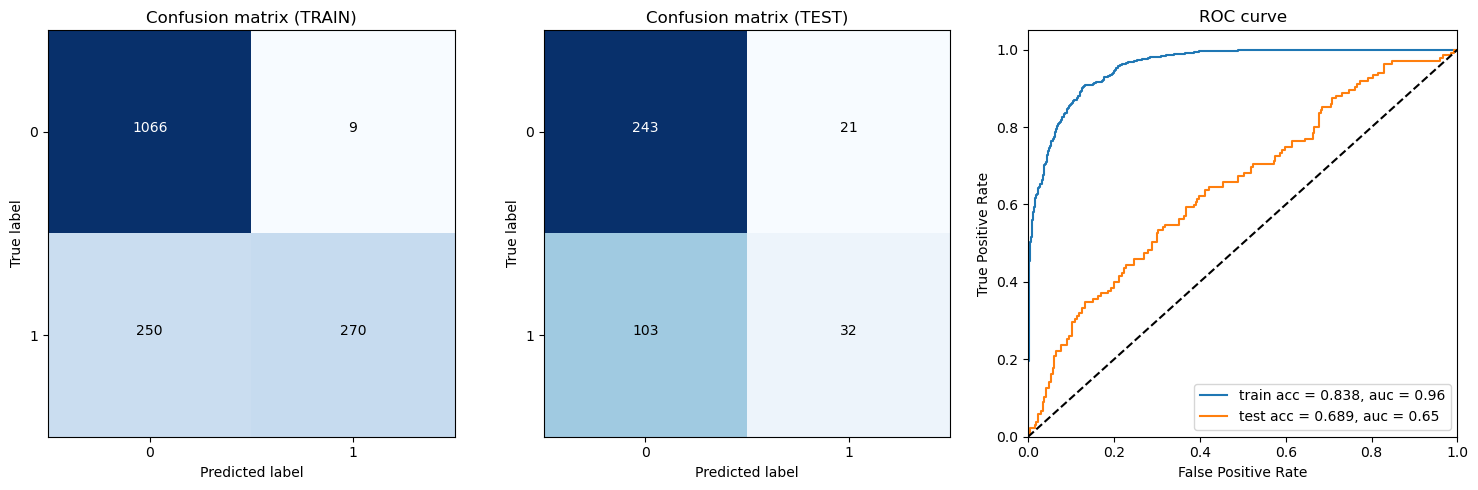

In [52]:
#模型评估可视化
y_train_pred = best_rf_clf.predict_proba(X_train_scaled)[:,1]
y_val_pred = best_rf_clf.predict_proba(X_val_scaled)[:,1]

threshold = 0.5

y_train_pred_class = (y_train_pred > threshold).astype(int)
y_test_pred_class = (y_val_pred > threshold).astype(int)

fig,ax = plt.subplots(1,3)
fig.set_size_inches(15,5)

plot_cm(ax[0],  y_train, y_train_pred, [0,1], 'Confusion matrix (TRAIN)', threshold)
plot_cm(ax[1],  y_val, y_val_pred,   [0,1], 'Confusion matrix (TEST)', threshold)
plot_auc(ax[2], y_train, y_train_pred, y_val, y_val_pred, threshold)
    
plt.tight_layout()
plt.show()

### 3.人工神经网络模型 ANN model

In [53]:
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam

# Build the ANN model
model = Sequential()
model.add(Dense(64, input_dim=X_train_scaled.shape[1], activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(1, activation='sigmoid'))


# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train_scaled, y_train, epochs=10, batch_size=32, validation_data=(X_val_scaled, y_val))

# Evaluate the model
val_loss, val_accuracy = model.evaluate(X_val_scaled, y_val)
print("Validation accuracy:", val_accuracy)

# 验证集预测
y_val_pred = (model.predict(X_val_scaled) > 0.5).astype("int32")
val_accuracy = accuracy_score(y_val, y_val_pred)
print("Validation accuracy:", val_accuracy)

# Make predictions on the test set
y_test_pred = (model.predict(test_data_scaled) > 0.5).astype(int).flatten()

# Prepare the submission file
submission = pd.DataFrame({'ID': test_data.index, 'DEFAULT': y_test_pred})
submission.to_csv('submission_ANN.csv', index=False)

Epoch 1/10
50/50 [==============================] - 1s 8ms/step - loss: 0.6348 - accuracy: 0.6734 - val_loss: 0.6308 - val_accuracy: 0.6516
Epoch 2/10
50/50 [==============================] - 0s 3ms/step - loss: 0.6003 - accuracy: 0.6940 - val_loss: 0.6193 - val_accuracy: 0.6617
Epoch 3/10
50/50 [==============================] - 0s 3ms/step - loss: 0.5883 - accuracy: 0.6922 - val_loss: 0.6192 - val_accuracy: 0.6591
Epoch 4/10
50/50 [==============================] - 0s 3ms/step - loss: 0.5791 - accuracy: 0.7047 - val_loss: 0.6180 - val_accuracy: 0.6642
Epoch 5/10
50/50 [==============================] - 0s 3ms/step - loss: 0.5726 - accuracy: 0.7047 - val_loss: 0.6171 - val_accuracy: 0.6566
Epoch 6/10
50/50 [==============================] - 0s 3ms/step - loss: 0.5677 - accuracy: 0.7085 - val_loss: 0.6201 - val_accuracy: 0.6516
Epoch 7/10
50/50 [==============================] - 0s 3ms/step - loss: 0.5643 - accuracy: 0.7141 - val_loss: 0.6275 - val_accuracy: 0.6416
Epoch 8/10
50/50 [==